# Принятие решений в бизнесе
Отдел маркетинга подготовил данные о 9 гипотезах для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B тест одной из гипотез и проанализировать результаты.

## Цели исследования

Часть 1. Приоритизация гипотез

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 2. Анализ A/B-теста

Проанализировать A/B-тест. Подготовить выводы по следующим пунктам:
1. Построить график кумулятивной выручки по группам.
2. Построить график кумулятивного среднего чека по группам.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
6. Построить точечный график количества заказов по пользователям.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
14. Принять решение по результатам теста и объясните его. 
    Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

## Загрузка и подготовка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import seaborn as sns
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_colwidth', 300)
import warnings
warnings.simplefilter('ignore')
plt.rcParams.update({'figure.figsize': (15,8)})
sns.set()

In [2]:
#сформируем датасеты
data_link = 'https://code.s3.yandex.net/datasets/hypothesis.csv'
hypothesis = pd.read_csv(data_link)
data_link = 'https://code.s3.yandex.net/datasets/orders.csv'
orders = pd.read_csv(data_link)
data_link = 'https://code.s3.yandex.net/datasets/visitors.csv'
visitors = pd.read_csv(data_link)

In [3]:
for data in [hypothesis, orders, visitors]:
    print('-' * 100)
    display (data.head())
    display (data.tail())
    display (data.sample())
    display (data.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)
    display (data.info())
    display (data.duplicated().sum())
    print()

----------------------------------------------------------------------------------------------------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Hypothesis,Reach,Impact,Confidence,Efforts
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10


,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Reach,9.00,4.78,3.15,1.00,1.40,3.00,3.00,8.00,9.20,9.84,10.00
Impact,9.00,4.78,3.19,1.00,1.40,3.00,3.00,7.00,9.60,9.92,10.00
Confidence,9.00,5.56,3.05,1.00,1.40,3.00,7.00,8.00,8.60,8.92,9.00
Efforts,9.00,4.89,2.80,1.00,1.80,3.00,5.00,6.00,9.20,9.84,10.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0


----------------------------------------------------------------------------------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


,transactionId,visitorId,date,revenue,group
1072,3559692217,2306096143,2019-08-12,1780,A


,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
transactionId,1197.00,2155621385.53,1229084904.76,1062393.00,233632506.40,1166775572.00,2145193898.00,3237740112.00,4067471456.20,4239148157.32,4293855558.00
visitorId,1197.00,2165960143.10,1236014192.15,5114589.00,236484761.40,1111826046.00,2217984702.00,3177606451.00,4080749199.80,4256040402.00,4283872382.00
revenue,1197.00,8348.01,39191.13,50.00,300.00,1220.00,2978.00,8290.00,28000.00,58233.20,1294500.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0


----------------------------------------------------------------------------------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


,date,group,visitors
44,2019-08-14,B,746


,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
visitors,62.00,607.29,114.40,361.00,395.55,534.00,624.50,710.50,747.90,769.39,770.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0

Согласно документации к данным:
Таблица hypothesis.csv содержит данные о гипотезах:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица  orders.csv содержит данные о заказах в период проведения A/B теста:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Таблица visitors.csv содержит данные о посетителях сайта в период A/B теста:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Пропусков и явных дубликатов в данных нет, но названия столбцов не соответствуют snake case. Так же данные о времени имею неверный формат. Исправим это.

In [4]:
#приведем к snake case
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
orders.columns = [x.replace('Id', '_id') for x in orders.columns.values]

In [5]:
#преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

In [6]:
#посмотрим результат
display (hypothesis.info())
display (orders.info())
display (visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [7]:
#проведем более подробный поиск дубликатов
for data in [hypothesis, visitors, orders]:
    for column in data:
        print('Количество уникальных значений:')
        display(data[column].value_counts())
        print('-' * 100)
        print()

Количество уникальных значений:


Запустить акцию, дающую скидку на товар в день рождения                                                         1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей        

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


3     3
8     2
1     1
2     1
5     1
10    1
Name: reach, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


3     3
1     1
2     1
5     1
7     1
9     1
10    1
Name: impact, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


8    3
1    1
2    1
3    1
4    1
7    1
9    1
Name: confidence, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


3     3
5     2
1     1
6     1
8     1
10    1
Name: efforts, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


2019-08-03    2
2019-08-26    2
2019-08-01    2
2019-08-14    2
2019-08-13    2
2019-08-10    2
2019-08-22    2
2019-08-15    2
2019-08-20    2
2019-08-24    2
2019-08-05    2
2019-08-18    2
2019-08-31    2
2019-08-27    2
2019-08-04    2
2019-08-12    2
2019-08-02    2
2019-08-09    2
2019-08-25    2
2019-08-19    2
2019-08-07    2
2019-08-23    2
2019-08-08    2
2019-08-16    2
2019-08-30    2
2019-08-17    2
2019-08-11    2
2019-08-21    2
2019-08-29    2
2019-08-06    2
2019-08-28    2
Name: date, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


B    31
A    31
Name: group, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


610    2
718    2
654    2
490    2
609    1
717    1
719    1
720    1
721    1
594    1
722    1
468    1
595    1
756    1
735    1
769    1
711    1
668    1
487    1
361    1
746    1
619    1
748    1
621    1
369    1
628    1
709    1
378    1
507    1
713    1
581    1
770    1
413    1
644    1
646    1
650    1
395    1
655    1
737    1
531    1
502    1
406    1
667    1
412    1
543    1
707    1
544    1
546    1
676    1
421    1
617    1
679    1
560    1
656    1
699    1
575    1
577    1
509    1
Name: visitors, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transaction_id, Length: 1197, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitor_id, Length: 1031, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-06    46
2019-08-15    46
2019-08-01    45
2019-08-28    45
2019-08-27    44
2019-08-02    44
2019-08-08    43
2019-08-19    43
2019-08-07    42
2019-08-29    42
2019-08-09    41
2019-08-26    41
2019-08-22    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-31    32
2019-08-20    32
2019-08-24    31
2019-08-18    26
2019-08-11    26
2019-08-25    24
2019-08-17    24
Name: date, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


990       17
890       13
390       13
1190      10
400       10
          ..
6440       1
45780      1
725        1
9800       1
202740     1
Name: revenue, Length: 713, dtype: int64

----------------------------------------------------------------------------------------------------

Количество уникальных значений:


B    640
A    557
Name: group, dtype: int64

----------------------------------------------------------------------------------------------------



Ничего подозрительного в данных я не нашел. Можно переходить в гипотезам. 

## Приоритизация гипотез
Датасет hypothesis содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задачи:
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Приоритизация по ICE

In [8]:
#расчитаем ICE и добавим оценку в таблицу
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

#выведем на экран
display(hypothesis.sort_values(by='ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Приоритизация по RICE

In [9]:
#расчитаем RICE и добавим оценку в таблицу
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

#выведем на экран
display(hypothesis.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Сразу видно, что изменение приоритизации гипотез происходит под влиянием параметра reach.
По RICE первое место занимает гипотеза с наибольшим охватом. Естественно, без учета этого параметра она опускается во фреймворке ICE на третье место.
Первое место по ICE занимает гипотеза с высокими показателями метрик кроме охвата из за редкого применения. Она применяется только в дни рождения. Поэтому данная гипотеза не попадает в топ фреймворка RICE, даже при учете остальных отличных показателей.

Охват имеет превалирующее значение при приоритизации гипотез со средними параметрами. Однако, даже высокий охват не способен значительно изменить приоритизацию гипотез с высокими параметрами.

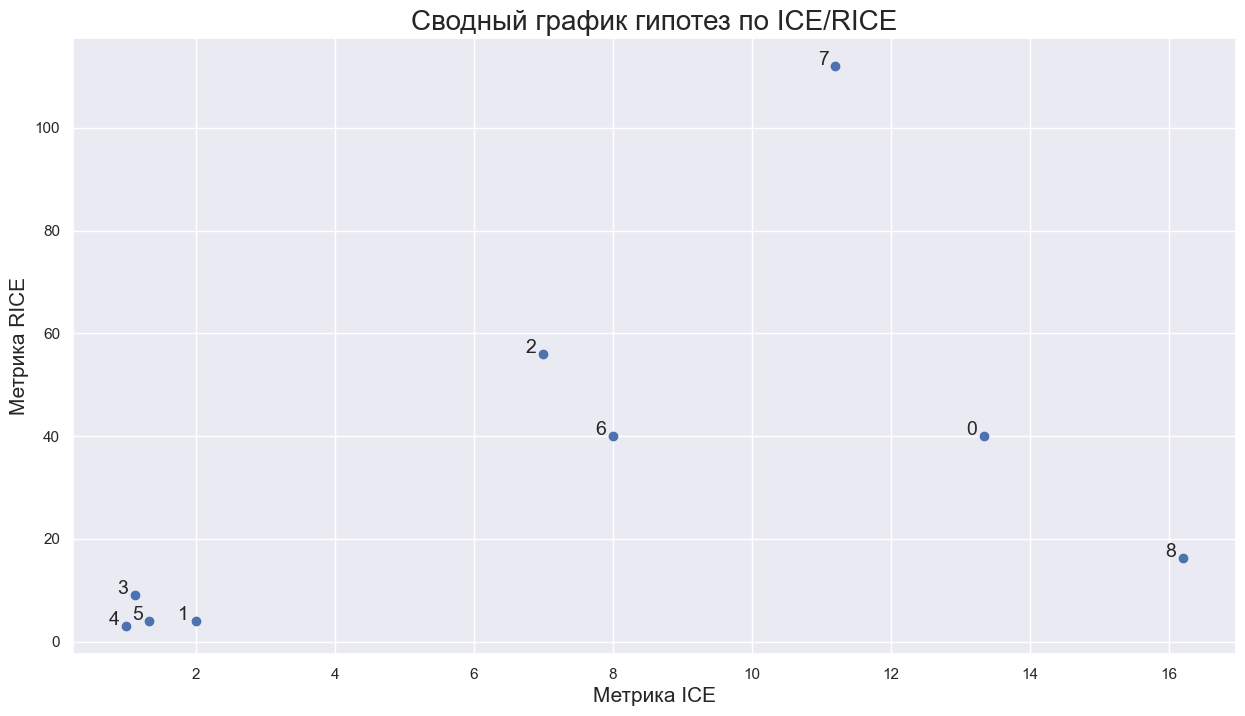

In [10]:
# построим визуализацию ICE/RICE
x = hypothesis['ICE']
y = hypothesis['RICE']
z = [i for i, h in enumerate(hypothesis['hypothesis'])]

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(
    x, y, 
)
for i in z:
    ax.annotate(i, (x[i]-0.25, y[i]+0.2), fontsize=14)

plt.title('Сводный график гипотез по ICE/RICE', fontsize=20)
plt.xlabel('Метрика ICE', fontsize=15)
plt.ylabel('Метрика RICE', fontsize=15);
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Супер, приоритезация гипотез выполнена отлично, молодец, что дополнительно визуализировал результаты👌</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
<ul>
   <li>в качестве визуализации изменения приоритетов также можно использовать <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a>
    <li> В отчёте есть формулы для расчёта приоритезации, почему бы их не оформить, для этого есть микропакет для вёрстки `LaTex` - <a href="https://www.youtube.com/watch?v=vSc25kdgecg">Использование LaTex в Jupyter Notebook</a>
<br><a href="https://www.overleaf.com/static/latex/learn/free-online-introduction-to-latex-part-1.pdf">LaTex for beginners</a>. Вот так будут выглядеть формулы:👇
</ul></div> <br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
<hr style="border: 2px solid orange;" />

## Анализ А/В теста
Проанализировать A/B-тест. Подготовить выводы и предположение по следующим пунктам:

1. Построить график кумулятивной выручки по группам.
2. Построить график кумулятивного среднего чека по группам.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
6. Построить точечный график количества заказов по пользователям.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
14. Принять решение по результатам теста и объясните его. 
    Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Скажи, пожалуйста, как в плане могли появится пункты про конверсию? В текущем брифе я не нашел таких пунктов🤔<div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Ну в данном случае я использовал слово в попытке сокращения, как отношение одного к другому и перепутав видимо перепутал с LTV (Lifetime Value) или другими метриками. Что не правильно с точки зрения постановки задания. Поправил использовав формулировки дословно без изменений.</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Супер👍</div> 

In [11]:
#из прошлого исследования данных мы знаем что visitor_id имеет ряд повторяющихся значений 
#проверим что они не попали в обе групы сразу
vis_AB = orders.groupby(['visitor_id']).agg({'group' : 'nunique'}).reset_index()
bad_list = vis_AB[vis_AB.group != 1]['visitor_id']
print(f'Пользователей, попавших в обе группы: {bad_list.count()}')

Пользователей, попавших в обе группы: 58


In [12]:
#уберем этих пользователей
bad_list = list(bad_list)
orders = orders.query('visitor_id not in @bad_list')

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Молодец, что выполнил проверку на пересечение пользователей👍</div> <br>

### Кумулятивная выручка по группам

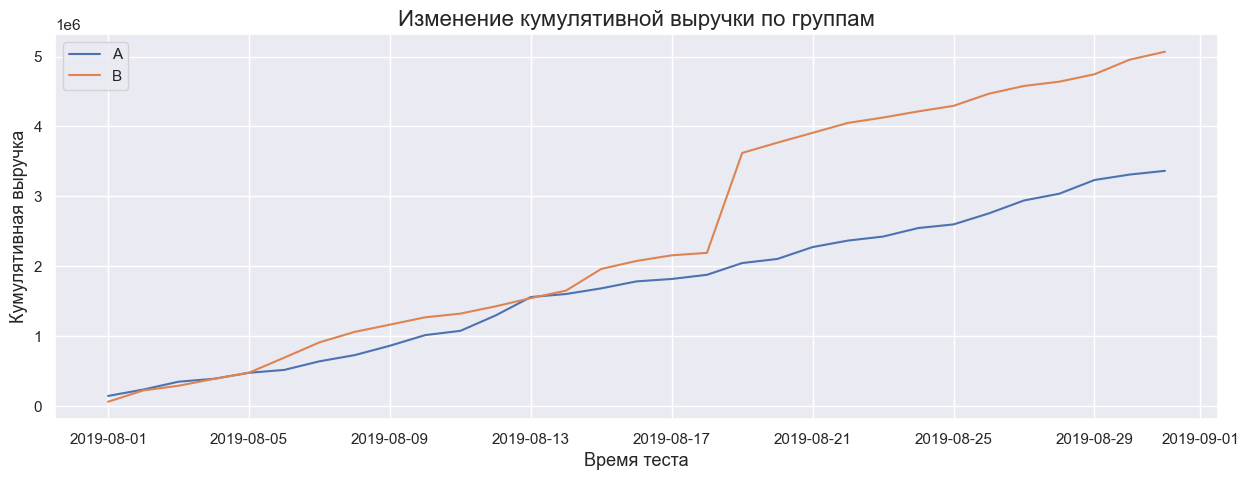

In [13]:
#кумулятивная
orders_a = orders[orders['group'] == 'A'].groupby('date').agg({'transaction_id' : 'nunique', 
                                       'visitor_id' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by='date').cumsum().reset_index()


orders_b = orders[orders['group'] == 'B'].groupby('date').agg({'transaction_id' : 'nunique', 
                                       'visitor_id' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by='date').cumsum().reset_index()
#построим графики
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(orders_a['date'], orders_a['revenue'], label = 'A')
ax.plot(orders_b['date'], orders_b['revenue'], label = 'B')

plt.title('Изменение кумулятивной выручки по группам', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивная выручка', fontsize=13)
plt.legend()
plt.show()

Во время теста выручка увеличивается у обеих групп. Группа В имеет немного больший рост начиная с 5 августа, а с 18 августа демонстрирует резкий скачок вверх. Это может быть связано либо с всплеском активности, либо с появлением в выборке крайне больших заказов.

### Кумулятивный стредний чек

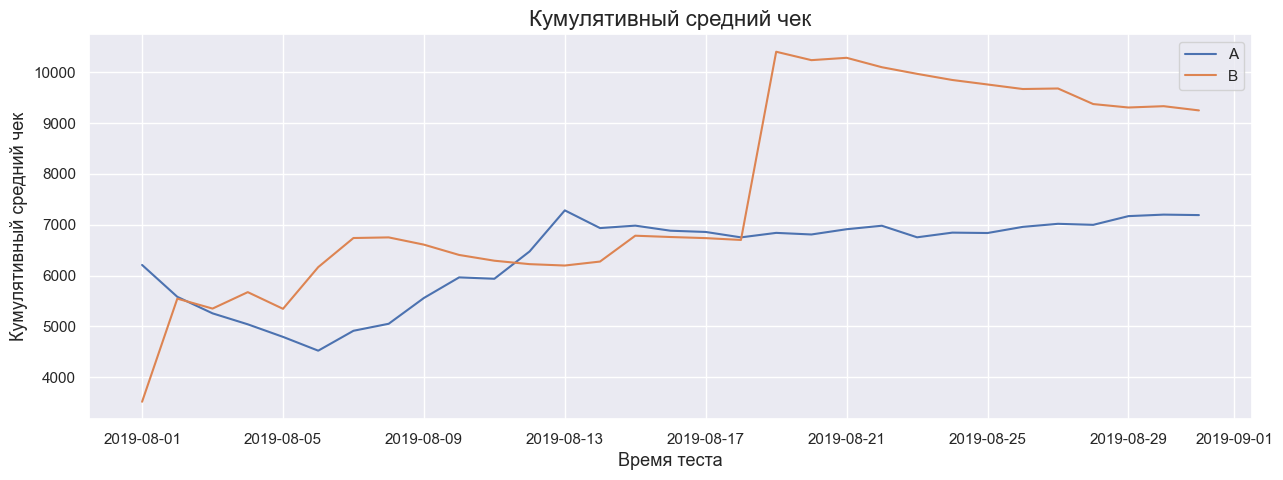

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(orders_a['date'], orders_a['revenue'] / orders_a['transaction_id'], label = 'A')
ax.plot(orders_b['date'], orders_b['revenue'] / orders_b['transaction_id'], label = 'B')

plt.title('Кумулятивный средний чек', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивный средний чек', fontsize=13)
plt.legend()
plt.show()

Средний чек также испытывает сильное колебание в тех же датах.

### Изменения кумулятивного среднего чека группы B к группе A

In [15]:
#собираем общую таблицу
orders_ab = orders_a.merge(orders_b, on='date', how='left', suffixes=('_a', '_b'))
orders_ab['rel_revenue'] = ((orders_ab['revenue_b']  / orders_ab['transaction_id_b'] ) 
    / (orders_ab['revenue_a']  / orders_ab['transaction_id_a'] ) - 1)
orders_ab.head(10)

,date,transaction_id_a,visitor_id_a,revenue_a,transaction_id_b,visitor_id_b,revenue_b,rel_revenue
0,2019-08-01,23,19,142779,17,17,59758,-0.43
1,2019-08-02,42,37,234381,40,39,221801,-0.01
2,2019-08-03,66,61,346854,54,53,288850,0.02
3,2019-08-04,77,72,388030,68,66,385740,0.13
4,2019-08-05,99,94,474413,89,87,475648,0.12
5,2019-08-06,114,106,515332,112,109,690490,0.36
6,2019-08-07,130,122,638580,135,132,909654,0.37
7,2019-08-08,144,136,727219,157,154,1059795,0.34
8,2019-08-09,155,147,861456,176,173,1162961,0.19
9,2019-08-10,170,162,1013731,198,195,1268123,0.07


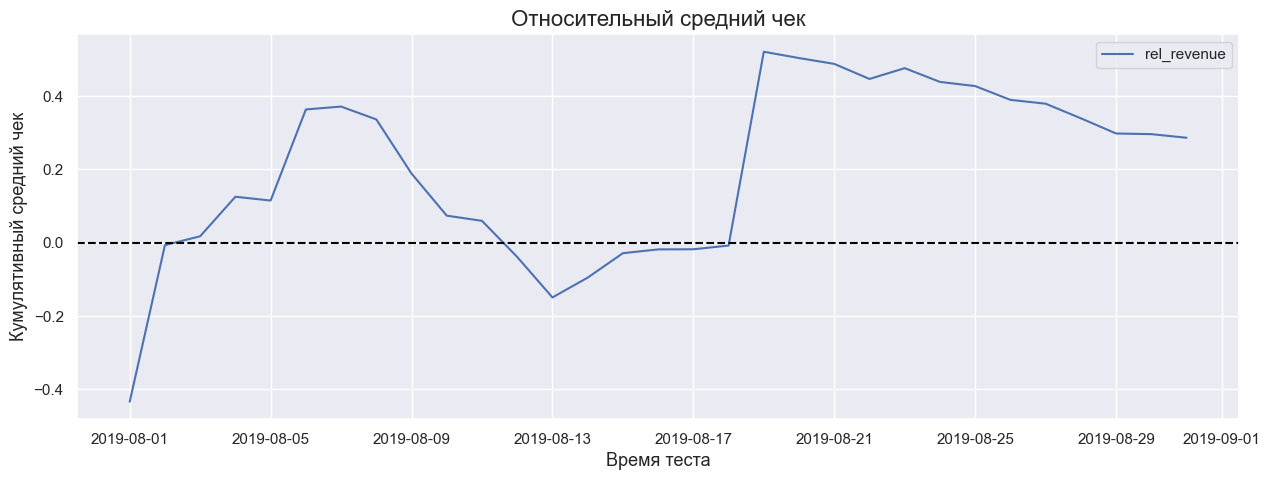

In [16]:
#строим график
orders_ab.plot('date', 'rel_revenue', figsize=(15, 5))

plt.title('Относительный средний чек', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивный средний чек', fontsize=13)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

Несмотря на общую положительную динамику, в нескольких сегментах изменение сильно скачет.

### Кумулятивное среднее количество заказов на посетителя по группам

In [17]:
#добавляем данные о посетителях и считаем кумулятивное среднее количество заказов на посетителя по группам
orders_a['visitors_a'] = visitors[visitors['group'] == 'A']['visitors'].reset_index(drop=True).cumsum(axis=0)
orders_a['conversion_a'] = orders_a['transaction_id'] / orders_a['visitors_a']

orders_b['visitors_b'] = visitors[visitors['group'] == 'B']['visitors'].reset_index(drop=True).cumsum(axis=0)
orders_b['conversion_b'] = orders_b['transaction_id'] / orders_b['visitors_b']

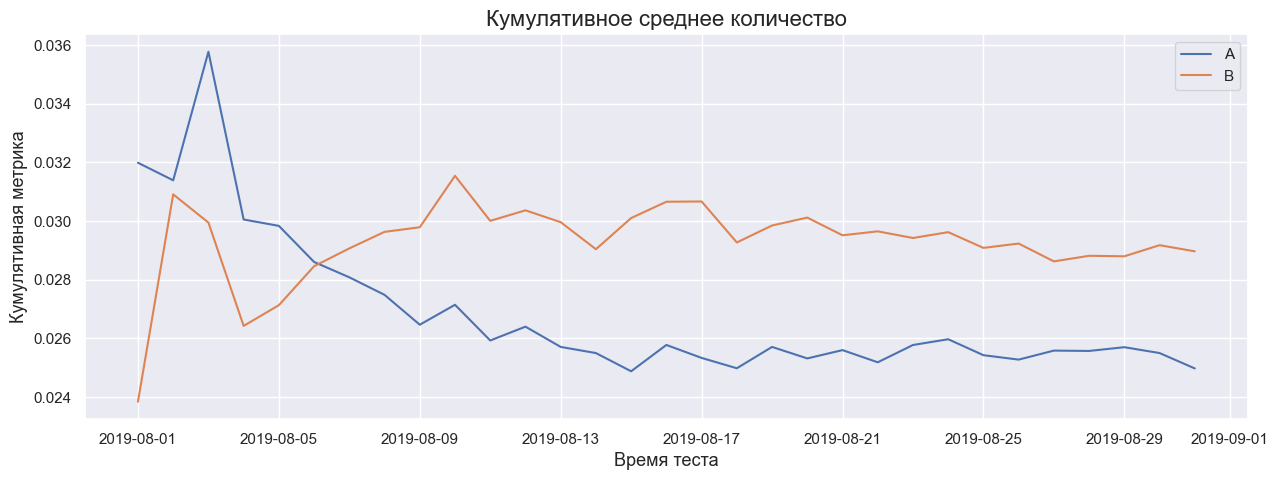

In [18]:
#строим график
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(orders_a.date, orders_a['conversion_a'], label = 'A')
ax.plot(orders_b.date, orders_b['conversion_b'], label = 'B')

plt.title('Кумулятивное среднее количество', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Кумулятивная метрика', fontsize=13)
plt.legend()
plt.show()

После резкого скачка (вниз для группы А и вверх для группы В), происходит относительная стабилизация на одном уровне (В выше А). Несмотря на колебания, среднее значение меняется не сильно. Возможно скачок связан с выбросами в датасете.

### Изменение кумулятивной среднего количества заказов на посетителя группы B к группе A

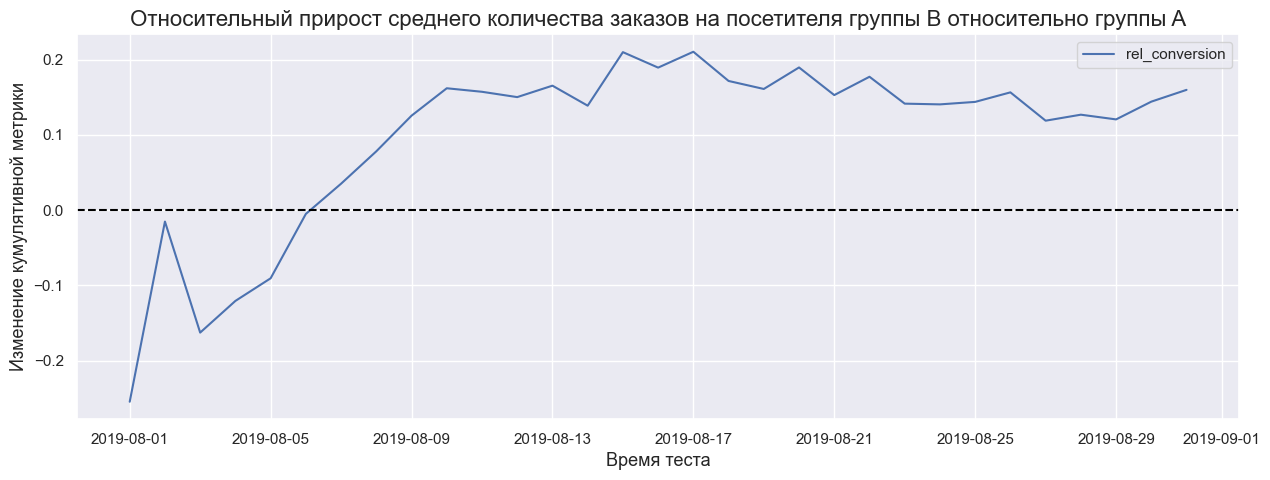

In [19]:
orders_ab['rel_conversion'] = orders_b['conversion_b'] / orders_a['conversion_a'] - 1
#строим график
orders_ab.plot('date', 'rel_conversion', figsize=(15, 5))

plt.title('Относительный прирост среднего количества заказов на посетителя группы B относительно группы A', fontsize=16)
plt.xlabel('Время теста', fontsize=13)
plt.ylabel('Изменение кумулятивной метрики', fontsize=13)
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend()
plt.show()

Кумулятивное среднее количество заказов на посетителя стабилизировалось после 13 числа. Причем группа A ниже группы B.

In [20]:
orders_ab.head()

,date,transaction_id_a,visitor_id_a,revenue_a,transaction_id_b,visitor_id_b,revenue_b,rel_revenue,rel_conversion
0,2019-08-01,23,19,142779,17,17,59758,-0.43,-0.25
1,2019-08-02,42,37,234381,40,39,221801,-0.01,-0.02
2,2019-08-03,66,61,346854,54,53,288850,0.02,-0.16
3,2019-08-04,77,72,388030,68,66,385740,0.13,-0.12
4,2019-08-05,99,94,474413,89,87,475648,0.12,-0.09


### Точечный график количества заказов по пользователям

In [21]:
orders_by_users_a = (
    orders.query('group == "A"')
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_b = (
    orders.query('group == "B"')
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

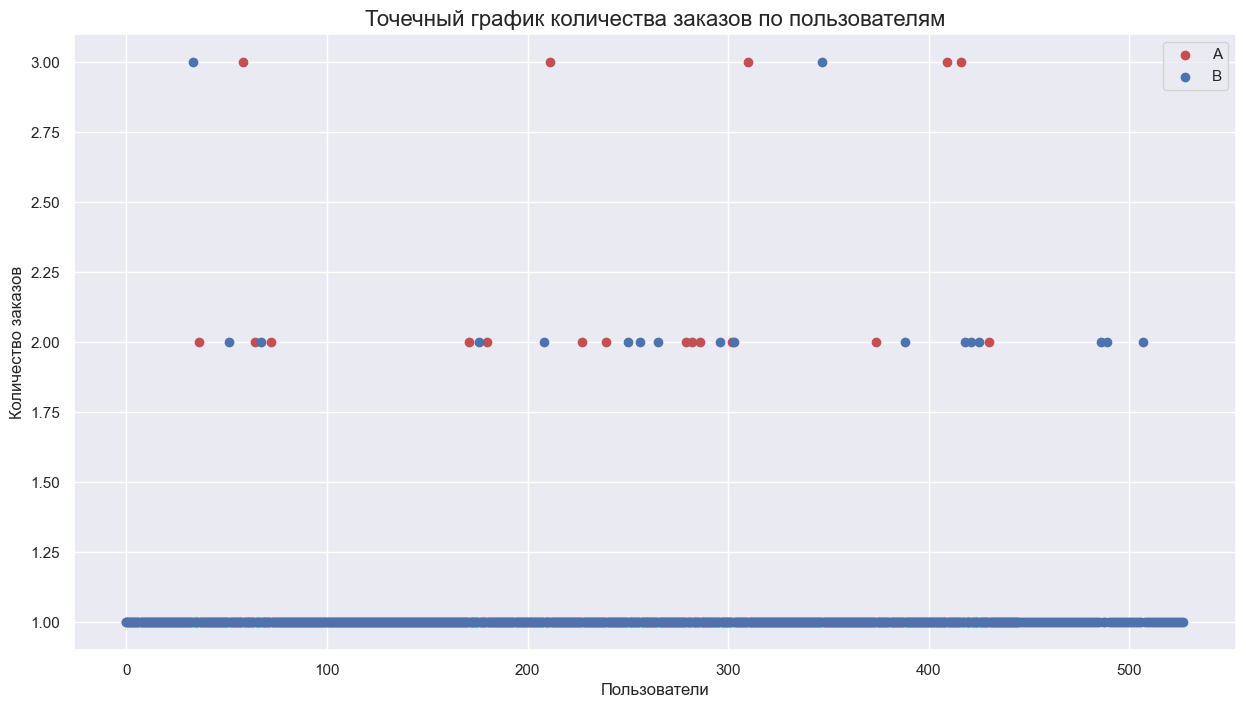

In [22]:
#строим график
a_values = pd.Series(range(0,len(orders_by_users_a)))
plt.scatter(a_values, orders_by_users_a['transaction_id'], color='r', label='А')
b_values = pd.Series(range(0,len(orders_by_users_b)))
plt.scatter(b_values, orders_by_users_b['transaction_id'], label='В')

plt.title('Точечный график количества заказов по пользователям', fontsize=16)
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.legend()
plt.show()

Подавляющее большинство пользователей совершает 1 заказ. На втором месте достаточно массивная группа, совершающая 2 заказа. 3 заказа было совершено всего 7 раз.

### Перцентили количества заказов на пользователя
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. После чего, выберем границу для определения аномальных пользователей.

In [23]:
#сформируем единый датасет, содержащий сведения по заказам
orders_by_users = (
    orders
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
#смотрим перцентали
print(np.percentile(orders_by_users['transaction_id'], [95, 99]))

[1. 2.]


Логичным выглядит для определенеия аномальных пользователей выбрать пользователей, имеющих 3 и более заказов.

### Точечный график стоимостей заказов

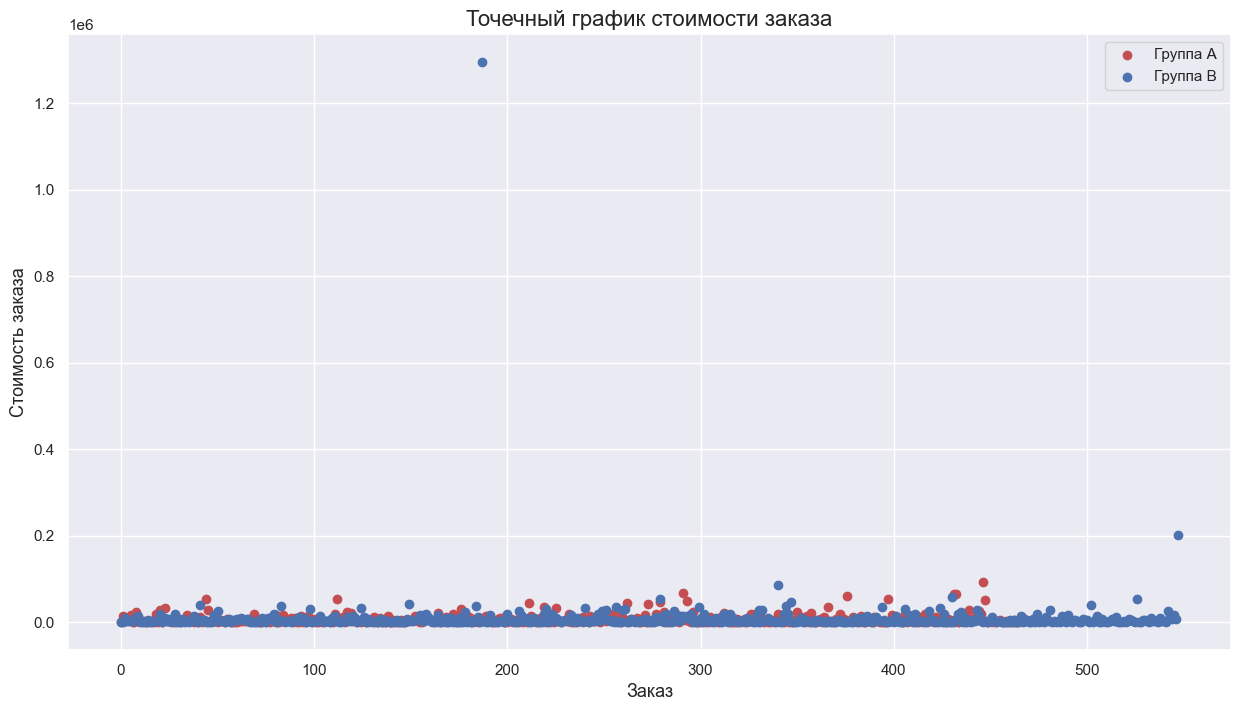

In [24]:
#строим график
a_values = pd.Series(range(0,len(orders.query('group == "A"')['revenue'])))
plt.scatter(a_values, orders.query('group == "A"')['revenue'], color='r', label='Группа А')
b_values = pd.Series(range(0,len(orders.query('group == "B"')['revenue'])))
plt.scatter(b_values, orders.query('group == "B"')['revenue'], label='Группа В')

plt.title('Точечный график стоимости заказа', fontsize=16)
plt.xlabel('Заказ', fontsize=13)
plt.ylabel('Стоимость заказа', fontsize=13)
plt.legend()
plt.show()

Есть два значительноых выброса, а также большое количество средних заказов. Чтобы определить пограничные цифры нужно подсчитать перцентили.

### Перцентили стоимости заказов

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


5% пользователей осуществляли заказыв на сумму менее 26785. Сумма 53904, характерная для 99% пользователей, значительно выше (в 2 раза), чем 95% заказов. Поэтому остановимся на сумме 27000, чтобы определить порог для отсеивания аномальных заказов.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
    <img width="320" src=https://storage.yandexcloud.net/public-bucket-6/outliers_1.png><br>
<ul>
    <li> Аномалии исследованы верно - ✅
    <li> Границы выбраны корректно - ✅</ul></div> <br>

### Статистическую значимость различий
Формирование гипотез для анализа А/В-теста
Для проведения анализа установим уровень статистической значимости, равный 5% (alpha = 0.05).

Также, определим гипотезы для проверки.

1. Гипотезы для среднего количества заказов на посетителя
 * H0 Статистически значимых различий в среднем количестве заказов на посетителя между группой А и группой В нет.

 * H1 Статистически значимые различия в среднем количестве заказов на посетителя между группой А и группой В есть.

2. Гипотезы для среднего чека
 * H0 Статистически значимых различий в среднем чеке между группой А и группой В нет.

 * H1 Статистически значимые различия в среднем чеке между группой А и группой В есть.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Гипотезы сформулированы верно ✅</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Было бы здорово указать также и выбранный стат тест</div> <br>

In [26]:
#для начала подготовим датафрейм для анализа А/В теста
#создадим фреймы, содержащие посетителей, разбитых по групам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitors_per_date_a']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitors_per_date_b']

# посчитаем кумулятивных посетителей
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1,)
visitorsACummulative.columns = ['date', 'visitors_cummulative_a']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitors_cummulative_b']
#создадим фреймы, содержащие заказы по групам
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# посчитаем суммы заказов
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a',]

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}), axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b',]

# подготовим итоговый датафрейм для расчетов эффективности А/В-теста
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# проверим результат
display(data.head()) 

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [27]:
#для пользователей, сделавших хотя бы один заказ, укажем число совершенных заказов
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_b.columns = ['user_id', 'orders']

In [28]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
            name='orders')], axis=0,)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(0,index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
            name='orders')], axis=0,)

#### Среднем количестве заказов на посетителя между группами по «сырым» данным

In [29]:
result = st.mannwhitneyu(sample_a, sample_b)[1]
alpha = 0.05
print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("{0:.4f}".format((data['orders_per_date_b'].sum()/data['visitors_per_date_b'].sum())
    /(data['orders_per_date_a'].sum()/data['visitors_per_date_a'].sum())-1))

p-значение:  0.011
Отвергаем нулевую гипотезу
0.1598


p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых изменений в среднем количестве заказов на посетителя между группами нет, можно отвергнуть.

Преимущество в группе В составляет 16%.

Следовательно, по «сырым», можно прийти к выводу, что между группами А и В есть различия с приемуществом в группе B на 16%

#### Среднем чеке заказа между группами по «сырым» данным

In [30]:
#пересчитаем статистику для среднего чека по сырым данным
result = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
alpha = 0.05
print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                     /orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.8295
Не получилось отвергнуть нулевую гипотезу
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом преимущество в среднем чеке группы В составляет 29%.

#### Чистка данных
95% пользователей соответствуют указанным ниже параметрам:

* Допустимое количество заказов на пользователя - 2;
* Допустимая сумма заказа - до 27000.

In [31]:
#узнаем количество аномальных пользователей
#выберем пользователей с количеством заказов 3 и более
bad_users = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id'],
    ], axis=0)
#выберем пользователей с суммой заказа более 27000
bad_users_orders = orders[orders['revenue'] > 27000]['visitor_id']

#объединим данные в единый фрейм аномальных пользователей
abnormal_users = (pd.concat([bad_users, bad_users_orders], axis=0).drop_duplicates().sort_values())
display(abnormal_users.head(5))
display(abnormal_users.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64

(58,)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Ручное указание порогов крайне не желательно, при изменении данных придется руками исправлять - можно допустить ошибку или пропустить. Удобнее использовать вычисляемые переменные, например:
    
```python
    REVENUE_THRESHOLD = df[revenue].quantile(0.99)
```

</div> <br>

В данных есть 58 пользователей, признанных нами аномальными. Используя эти данные, очистим датасет от выбросов и пересчитаем статистическую достоверность исследования.

In [32]:
#подготовим выборки, очищенные от выбросов
sample_a_fil = pd.concat(
    [
        orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'], 
        pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ), name='orders')], axis=0)
sample_b_fil = pd.concat(
    [
        orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'], 
        pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ), name='orders')], axis=0)

#### Среднем количестве заказов на посетителя между группами по «очищенным» данным

In [33]:
result = st.mannwhitneyu(sample_a_fil, sample_b_fil)[1]
alpha = 0.05
print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('{0:.4f}'.format(sample_b_fil.mean()/sample_a_fil.mean()-1))

p-значение:  0.0124
Отвергаем нулевую гипотезу
0.1819


p-value = 0.0124 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых изменений в среднем количестве заказов на посетителя между группами нет, можно отвергнуть.

Преимущество в группе В по сравнению с сырыми данными выросло на 2% и составило 18%.

Следовательно, по «очищенным» данным, можно прийти к выводу, что между группами А и В есть различия. А преимущество в 18% получено не случайным образом.

#### Среднем чеке заказа между группами по «очищенным» данным

In [34]:
result = st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'])[1]

alpha = 0.05
print('p-значение: ', result.round(4))
if result < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print(
    "{0:.4f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()- 1))

p-значение:  0.6459
Не получилось отвергнуть нулевую гипотезу
-0.0485


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом преимущество в среднем чеке группы А  выше на 5%, чем в группе В. Это коререлирует с тем фактом, что по сырым данным не удалось отвергнуть гипотезу о различии среднего чека. А различие в 29% в пользу группы В было получено случайным образом. Как мы выяснили, за счет аномальных клиентов.

### Вывод по результатам теста
 Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп. 
 2. Остановить тест, зафиксировать отсутствие различий между группами. 
 3. Продолжить тест.

По результатам исследования материалов А/В-теста, можно прийти к следующим выводам:

1. В выборках пристутствовали выбросы, которые искажали результаты.
2. 95% пользователей соответствуют этим совершают 1-2 заказа на сумму до 27000.
3. По результатам очистки выборок от аномалий, можно однозначно считать, что группа В превосходит группу А в показателе  среднем количестве заказов на посетителя на 18%.
4. И хотя на сырых данных разница между средним чеком составляла 29% в пользу группы В, после очистки данных, можно считать, что средний чек практчески не меняется между группами (разницей в 5% в пользу группы А можно пренебречь, как незначительной аномалией, учитывая статистическое подтверждение гипотезы об отсутствии разницы между средними чеками групп).
5. Учитывая стабилизацию значений на графике, можно сделать предварительные выводы об исходе А/В-теста:
* Если считать 1200 наблюдений за конкретный месяц достаточным и достоверным для вида деятельности магазина то А/В тест можно считать произведенным успешно. Гипотеза о превосходстве выручки группы В подтверждена (при отсутствии разницы в среднем чеке), а значения стабилизировались на графиках.
* Если в виду деятельности магазина данные не могут быть признанными достоверными, то необходимо перенести и/или продлить процесс тестирования.
6. Одни и те же пользователи попали в разные группы. Необходимо проверить процедуру формирования выборок.


## Вывод
Тестируемая гипотеза не влияет на средний чек, но влияет на среднее количество заказов на посетителя (увеличивая её на 18% для группы В). Тест можно считать успешно проведенным и переходить к тестированию другой гипотезы.

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Михаил, работа выполнена отлично, серьезных замечаний нет, единственный вопрос: _использование конверсии_ . Этот пункт нужно обсудить с куратором🧐

Исправляй и отправляй на проверку🛠